Import necessary libraries.

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

Get image file names

In [5]:
image_folder = os.path.abspath('03_mnist_convolutional\\01_own_test_data')
image_filenames = os.listdir(image_folder)
print(image_filenames)

['digit0.png', 'digit1.png', 'digit2.png', 'digit3.png', 'digit4.png', 'digit5.png', 'digit6.png', 'digit7.png', 'digit8.png', 'digit9.png']


Load in the own test data for model testing

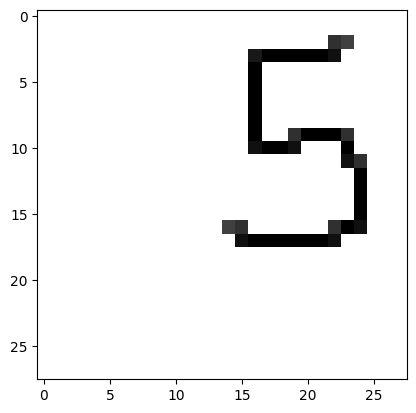

In [8]:
own_test_data = []
for filename in image_filenames:
    image_path = os.path.join(image_folder, filename)
    img = Image.open(image_path).convert('L')  
    img = img.resize((28, 28)) 
    img_array = np.array(img)
    img_array = img_array / 255.0  
    img_array = img_array[..., np.newaxis]  
    own_test_data.append(img_array)

own_test_data = np.array(own_test_data)

pixels = own_test_data[0].reshape((28, 28))
plt.imshow(pixels, cmap='binary')
plt.show()



Get MNIST data and plot

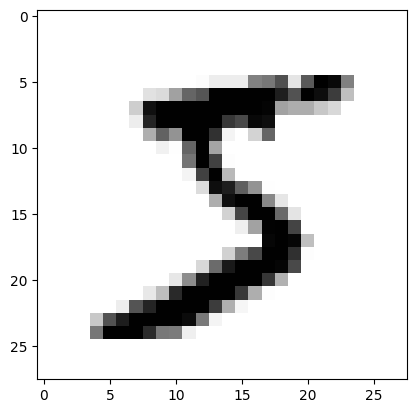

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

pixels = x_train[0].reshape((28, 28))
plt.imshow(pixels, cmap='binary')
plt.show()

Create and train model

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=3, batch_size=32, validation_split=0.1)

Results

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

Test with own data

In [ ]:
sample_number_index = 0
sample_to_predict = own_test_data[sample_number_index]
sample_to_predict = np.expand_dims(sample_to_predict, axis=0)  # Convert to a batch of size 1

prediction = model.predict(sample_to_predict)
predicted_class = np.argmax(prediction)

pixels = own_test_data[sample_number_index].reshape((28, 28))
plt.imshow(pixels, cmap='binary')
plt.show()

print(f'This number is on the {sample_number_index} index and the model thinks it is a {predicted_class}')